<b> <h3> Manufacturing Efficiency <h3> <b>
<b> <h5> Using a Kaggle dataset that captures production planning and optimization data from Hybrid Manufacturing Systems (HMS), I will explore the data to see the reasons behind low efficiency. This notebook includes data preparation, exploratory data analysis, and regression analysis. <b> <h5>

In [37]:
#Import Dataset
import pandas as pd
df = pd.read_csv('/Users/jensa/Downloads/kaggle/hybrid_manufacturing_categorical.csv')

In [38]:
#View dataset
df.head(5)

,Job_ID,Machine_ID,Operation_Type,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Scheduled_Start,Scheduled_End,Actual_Start,Actual_End,Job_Status,Optimization_Category
0,J001,M01,Grinding,3.17,76,11.42,96,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-18 08:05:00,2023-03-18 09:21:00,Completed,Moderate Efficiency
1,J002,M01,Grinding,3.35,79,6.61,84,2023-03-18 08:10:00,2023-03-18 09:29:00,2023-03-18 08:20:00,2023-03-18 09:39:00,Delayed,Low Efficiency
2,J003,M04,Additive,2.29,56,11.11,92,2023-03-18 08:20:00,2023-03-18 09:16:00,NaN,NaN,Failed,Low Efficiency
3,J004,M04,Grinding,1.76,106,12.50,95,2023-03-18 08:30:00,2023-03-18 10:16:00,2023-03-18 08:35:00,2023-03-18 10:21:00,Completed,Moderate Efficiency
4,J005,M01,Lathe,1.90,46,8.13,88,2023-03-18 08:40:00,2023-03-18 09:26:00,2023-03-18 08:42:00,2023-03-18 09:28:00,Completed,High Efficiency


In [39]:
#Understand data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_ID                 1000 non-null   object 
 1   Machine_ID             1000 non-null   object 
 2   Operation_Type         1000 non-null   object 
 3   Material_Used          1000 non-null   float64
 4   Processing_Time        1000 non-null   int64  
 5   Energy_Consumption     1000 non-null   float64
 6   Machine_Availability   1000 non-null   int64  
 7   Scheduled_Start        1000 non-null   object 
 8   Scheduled_End          1000 non-null   object 
 9   Actual_Start           871 non-null    object 
 10  Actual_End             871 non-null    object 
 11  Job_Status             1000 non-null   object 
 12  Optimization_Category  1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


There is null entries in columns Actual_Start and Actual_End, but this is because these are jobs that failed. Therefore, they are not missing values, and the data is clean.

<b><h3> Exploratory Data Analysis <h3><b>

In [40]:
#Import packages for exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of Instances')

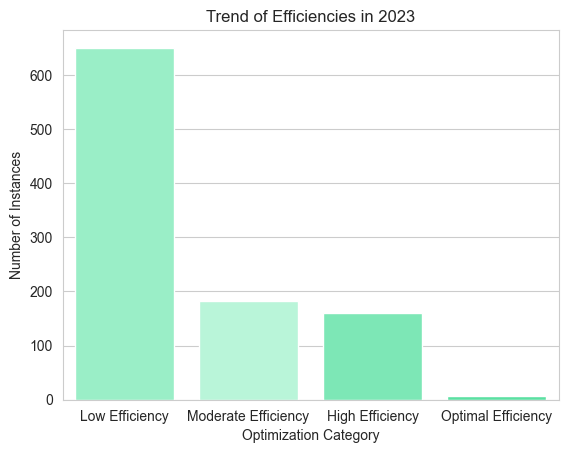

In [41]:
#See trend of efficiencies
x1 = df["Optimization_Category"]
sns.countplot(df, x=x1,hue=x1,palette=['#AFFFDA','#8CFCC8','#6BF9B7','#45F6A4'],order=['Low Efficiency','Moderate Efficiency','High Efficiency','Optimal Efficiency'])
plt.title("Trend of Efficiencies in 2023")
plt.xlabel("Optimization Category")
plt.ylabel("Number of Instances")

The graph shows a trend where we have more instances of low efficiency manufacturing process rather than moderate, high and optimal. It indicates that the current manufacturing process is inefficient.

In [42]:
#Create dummy variables for Optimization Category
dummy_variable_1 = pd.get_dummies(df['Optimization_Category'],dtype=int)
dummy_variable_1.head(5)

,High Efficiency,Low Efficiency,Moderate Efficiency,Optimal Efficiency
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0


In [43]:
#Create dummy variable for Operation Type
dummy_variable_2 = pd.get_dummies(df['Operation_Type'],dtype=int)
dummy_variable_2.head()

,Additive,Drilling,Grinding,Lathe,Milling
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [44]:
#Combine the dummy variables into the table
df = pd.concat([df, dummy_variable_1],axis=1)
df = pd.concat([df, dummy_variable_2],axis=1)
df.head(5)

,Job_ID,Machine_ID,Operation_Type,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Scheduled_Start,Scheduled_End,Actual_Start,...,Optimization_Category,High Efficiency,Low Efficiency,Moderate Efficiency,Optimal Efficiency,Additive,Drilling,Grinding,Lathe,Milling
0,J001,M01,Grinding,3.17,76,11.42,96,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-18 08:05:00,...,Moderate Efficiency,0,0,1,0,0,0,1,0,0
1,J002,M01,Grinding,3.35,79,6.61,84,2023-03-18 08:10:00,2023-03-18 09:29:00,2023-03-18 08:20:00,...,Low Efficiency,0,1,0,0,0,0,1,0,0
2,J003,M04,Additive,2.29,56,11.11,92,2023-03-18 08:20:00,2023-03-18 09:16:00,NaN,...,Low Efficiency,0,1,0,0,1,0,0,0,0
3,J004,M04,Grinding,1.76,106,12.50,95,2023-03-18 08:30:00,2023-03-18 10:16:00,2023-03-18 08:35:00,...,Moderate Efficiency,0,0,1,0,0,0,1,0,0
4,J005,M01,Lathe,1.90,46,8.13,88,2023-03-18 08:40:00,2023-03-18 09:26:00,2023-03-18 08:42:00,...,High Efficiency,1,0,0,0,0,0,0,1,0


In [45]:
#Now, we want to see if there is a trend of efficiencies according to the operation type
#Group the dataset based on Operation Type
optype = df.groupby('Operation_Type').sum().reset_index()
keep_columns = ['Operation_Type','High Efficiency','Low Efficiency','Moderate Efficiency','Optimal Efficiency']
optype_cat = optype[keep_columns]
optype_cat.head(5)

,Operation_Type,High Efficiency,Low Efficiency,Moderate Efficiency,Optimal Efficiency
0,Additive,36,115,36,3
1,Drilling,25,117,47,0
2,Grinding,28,152,28,0
3,Lathe,43,131,38,0
4,Milling,29,135,34,3


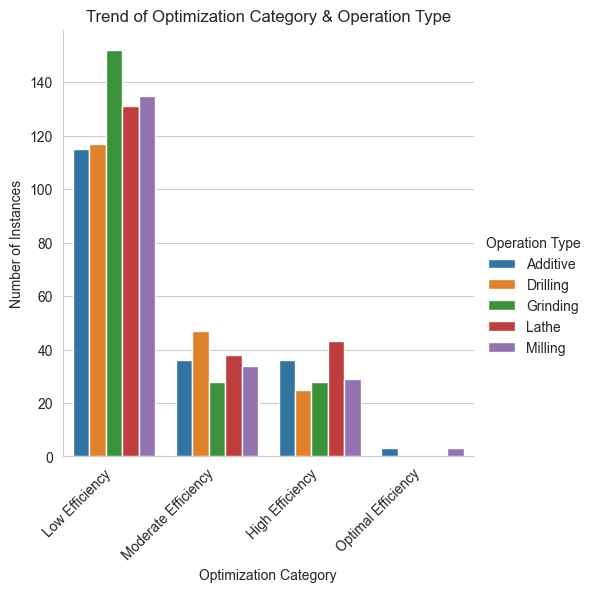

In [46]:
graph2 = sns.catplot(data=optype_cat.melt('Operation_Type'),
            kind='bar',
            x='variable',
            y='value',
            hue='Operation_Type',order=['Low Efficiency','Moderate Efficiency','High Efficiency','Optimal Efficiency'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Instances")
plt.xlabel("Optimization Category")
plt.title("Trend of Optimization Category & Operation Type")

legend = graph2._legend
legend.set_title("Operation Type")

The above graph shows that a high number of low efficiency process are found across all operation types. For all other optimization category, there is no trend as well of a specific operation types improving as the efficiency increases. This suggests there is little impact of operation type to increasing efficiency.

As the exploratory data analysis doesn't suggest any relationship of the operation type to the optimization category, I will now look at the regression analysis to see relationships of the other variables.b

<b> <h3> Correlation & Regression <h3> <b>

In [47]:
#Create dataset of variables and low efficiency as output
keep_columns2 = ['Material_Used','Processing_Time','Energy_Consumption','Machine_Availability','Low Efficiency']
low_model = df[keep_columns2]
low_model.head(5)

,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Low Efficiency
0,3.17,76,11.42,96,0
1,3.35,79,6.61,84,1
2,2.29,56,11.11,92,1
3,1.76,106,12.50,95,0
4,1.90,46,8.13,88,0


In [48]:
#Finding out the correlation of the variables to low efficiency
low_model.corr()

,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Low Efficiency
Material_Used,1.000000,0.010403,0.023735,0.012664,0.002280
Processing_Time,0.010403,1.000000,0.000371,0.002847,0.060121
Energy_Consumption,0.023735,0.000371,1.000000,-0.072023,-0.010792
Machine_Availability,0.012664,0.002847,-0.072023,1.000000,0.014955
Low Efficiency,0.002280,0.060121,-0.010792,0.014955,1.000000


The correlation is as below:
1. The probability for low efficiency increases with an increase in material used, processing time, and machine availability. With a higher material used and higher processing time, manufacturing is more complex. However, an increase in machine availability doesn't help to increase probability of higher efficiency.
2. The probability for low efficiency decreases with an increase in energy consumption. This indicates that to lower the chances of low efficiency, energy consumption need to increase.

In [49]:
#Regression analysis to find out if the model is reliable
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = low_model[['Material_Used','Processing_Time','Energy_Consumption','Machine_Availability']]
Y = low_model[['Low Efficiency']]
lm.fit(X,Y)

lm.score(X,Y)

0.00393152408855435

R^2 square of 0.0039 suggests that the independent variables only explain 0.39% of the dependent variable. Therefore, the independent variables are not a good fit to explain the reason for low efficiency.